# **1. 포켓몬 분류**

* Train: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one
* Validation: https://www.kaggle.com/hlrhegemony/pokemon-image-dataset

In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'jeongwonryu'
os.environ['KAGGLE_KEY'] = 'ff53fbef42983aa07faace6e40106e87'

In [3]:
!kaggle datasets download -d thedagger/pokemon-generation-one

Dataset URL: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one
License(s): GPL-2.0
 99% 2.14G/2.15G [00:10<00:00, 225MB/s]
100% 2.15G/2.15G [00:10<00:00, 216MB/s]


In [4]:
!unzip -q /content/pokemon-generation-one.zip

In [5]:
!kaggle datasets download -d hlrhegemony/pokemon-image-dataset

Dataset URL: https://www.kaggle.com/datasets/hlrhegemony/pokemon-image-dataset
License(s): CC0-1.0
 67% 39.0M/57.9M [00:00<00:00, 152MB/s] 
100% 57.9M/57.9M [00:00<00:00, 164MB/s]


In [6]:
!unzip -q /content/pokemon-image-dataset.zip

In [7]:
!mv dataset train

In [8]:
!rm -rf train/dataset

In [9]:
!mv images validation

In [10]:
train_labels = os.listdir('train')
print(train_labels)
print(len(train_labels))

['Seel', 'MrMime', 'Kabutops', 'Kangaskhan', 'Lickitung', 'Pinsir', 'Gloom', 'Dugtrio', 'Pikachu', 'Exeggcute', 'Spearow', 'Seaking', 'Dratini', 'Machop', 'Ninetales', 'Raticate', 'Primeape', 'Krabby', 'Jolteon', 'Charizard', 'Blastoise', 'Graveler', 'Venusaur', 'Horsea', 'Machoke', 'Jynx', 'Magneton', 'Rapidash', 'Magnemite', 'Seadra', 'Gyarados', 'Venonat', 'Golem', 'Shellder', 'Ponyta', 'Pidgeotto', 'Beedrill', 'Parasect', 'Venomoth', 'Chansey', 'Weezing', 'Hypno', 'Wigglytuff', 'Magikarp', 'Charmander', 'Sandshrew', 'Muk', 'Weepinbell', 'Moltres', 'Sandslash', 'Dodrio', 'Poliwrath', 'Machamp', 'Caterpie', 'Scyther', 'Nidoqueen', 'Slowbro', 'Zapdos', 'Growlithe', 'Dewgong', 'Bulbasaur', 'Haunter', 'Meowth', 'Poliwhirl', 'Farfetchd', 'Tentacool', 'Squirtle', 'Ekans', 'Porygon', 'Vileplume', 'Clefable', 'Vulpix', 'Flareon', 'Lapras', 'Nidoking', 'Articuno', 'Golduck', 'Psyduck', 'Slowpoke', 'Tauros', 'Goldeen', 'Tentacruel', 'Drowzee', 'Doduo', 'Wartortle', 'Dragonite', 'Clefairy', 'D

In [11]:
val_labels = os.listdir('validation')
print(val_labels)
print(len(val_labels))

['Seel', 'Bewear', 'Cherubi', 'Thundurus', 'Indeedee', 'Sawk', 'Skuntank', 'Zorua', 'Roselia', 'Hattrem', 'Litleo', 'Groudon', 'Bastiodon', 'Cufant', 'Karrablast', 'Musharna', 'Sizzlipede', 'Teddiursa', 'Deoxys', 'Kabutops', 'Zeraora', 'Carnivine', 'Kangaskhan', 'Zoroark', 'Cryogonal', 'Lickitung', 'Ariados', 'Lunatone', 'Shiinotic', 'Silcoon', 'Gallade', 'Hawlucha', 'Dusknoir', 'Pansear', 'Pinsir', 'Eldegoss', 'Type Null', 'Dusclops', 'Centiskorch', 'Nickit', 'Vanilluxe', 'Scrafty', 'Glameow', 'Amaura', 'Seedot', 'Gloom', 'Bruxish', 'Dugtrio', 'Magearna', 'Pikipek', 'Happiny', 'Cursola', 'Stunfisk', 'Pikachu', 'Zacian', 'Dragalge', 'Drampa', 'Deino', 'Dreepy', 'Masquerain', 'Dubwool', 'Croconaw', 'Torkoal', 'Leavanny', 'Bronzong', 'Anorith', 'Druddigon', 'Milotic', 'Magmortar', 'Vikavolt', 'Huntail', 'Makuhita', 'Frogadier', 'Sandygast', 'Oricorio', 'Duskull', 'Phantump', 'Hoothoot', 'Wishiwashi', 'Stakataka', 'Sunflora', 'Exeggcute', 'Spearow', 'Hippopotas', 'Patrat', 'Swampert', 'Tr

In [12]:
import shutil

In [13]:
for val_label in val_labels:
    if val_label not in train_labels:
        shutil.rmtree(os.path.join('validation', val_label))

In [14]:
val_labels = os.listdir('validation')
len(val_labels)

147

In [15]:
for train_label in train_labels:
    if train_label not in val_labels:
        print(train_label)

MrMime
Farfetchd


In [16]:
for train_label in train_labels:
    if train_label not in val_labels:
        print(train_label)
        os.makedirs(os.path.join('validation', train_label), exist_ok=True)

MrMime
Farfetchd


In [17]:
val_labels = os.listdir('validation')
len(val_labels)

149

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [20]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'validation': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
}

In [22]:
image_datasets = {
    'train': datasets.ImageFolder('train', data_transforms['train']),
    'validation': datasets.ImageFolder('validation', data_transforms['validation'])
}

In [23]:
dataloaders = {
    'train': DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'validation': DataLoader(
        image_datasets['validation'],
        batch_size=32,
        shuffle=False
    )
}

In [24]:
print(len(image_datasets['train']), len(image_datasets['validation']))

10657 661


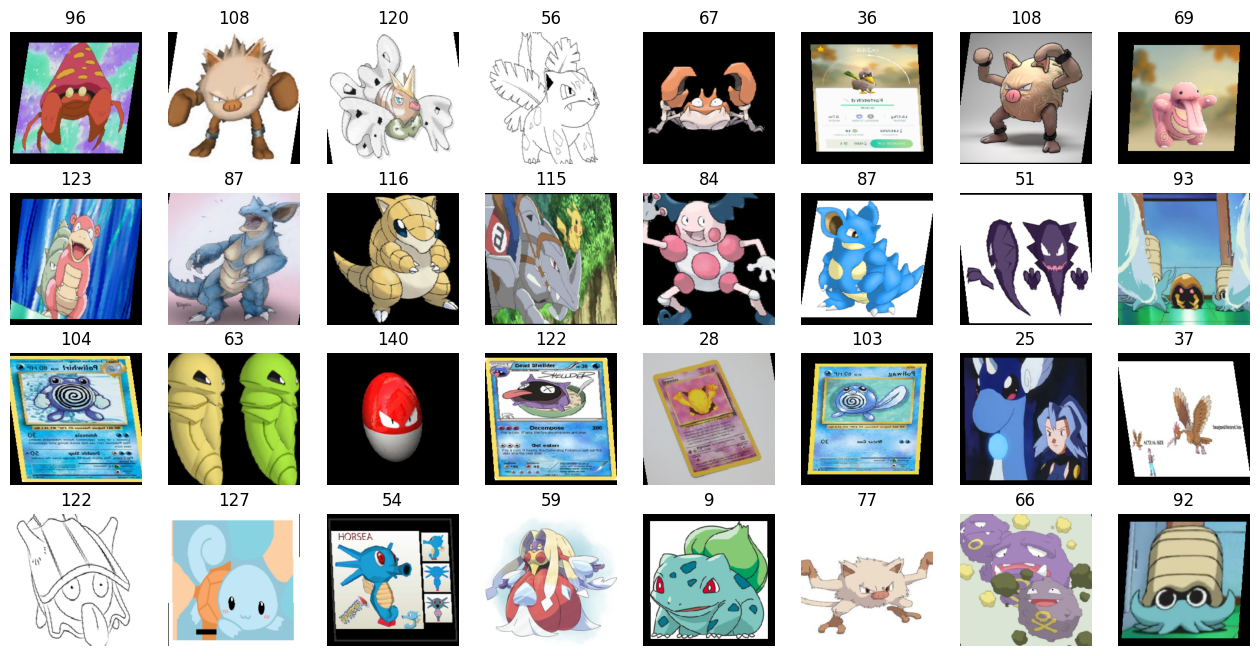

In [25]:
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize=(16, 8))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(label.item())
    ax.axis('off')

In [26]:
image_datasets['train'].classes[101]

'Pikachu'

# **2. EfficientNet**
* 구글의 연구팀이 개발한 이미지 분류, 객체 검출 등 컴퓨터 비전 작업에서 높은 성능을 보여주는 신경망 모델
* 신경망의 깊이, 너비, 해상도를 동시에 확장하는 방법을 통해 효율성과 성능을 극대화한 것이 특징
* EfficientnetB4는 EfficientNet 시리즈의 중간 크기 모델

In [27]:
from torchvision.models import efficientnet_b4, EfficientNet_B4_Weights
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

In [28]:
def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)

WeightsEnum.get_state_dict = get_state_dict

In [29]:
model = efficientnet_b4(weights=EfficientNet_B4_Weights.IMAGENET1K_V1).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-23ab8bcd.pth
100%|██████████| 74.5M/74.5M [00:00<00:00, 153MB/s]


In [30]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [31]:
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512, 149)
).to(device)
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [32]:
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 10

for epoch in range(epochs):
    for phase in ['train', 'validation']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        sum_losses = 0
        sum_accs = 0

        for x_batch, y_batch in dataloaders[phase]:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            y_pred = model(x_batch)
            loss = nn.CrossEntropyLoss()(y_pred, y_batch)

            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            sum_losses = sum_losses + loss

            y_prob = nn.Softmax(1)(y_pred)
            y_pred_index = torch.argmax(y_prob, axis=1)
            acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
            sum_accs = sum_accs + acc

        avg_loss = sum_losses / len(dataloaders[phase])
        avg_acc = sum_accs / len(dataloaders[phase])
        print(f'{phase:10s}: Epoch {epoch+1:4d}/{epochs} Loss: {avg_loss:.4f} Accuracy: {avg_acc:.2f}%')


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train     : Epoch    1/10 Loss: 3.3336 Accuracy: 29.85%
validation: Epoch    1/10 Loss: 1.5111 Accuracy: 68.95%
train     : Epoch    2/10 Loss: 1.8052 Accuracy: 57.02%
validation: Epoch    2/10 Loss: 0.9467 Accuracy: 77.29%
train     : Epoch    3/10 Loss: 1.4618 Accuracy: 63.71%
validation: Epoch    3/10 Loss: 0.8085 Accuracy: 80.79%
train     : Epoch    4/10 Loss: 1.2563 Accuracy: 67.76%
validation: Epoch    4/10 Loss: 0.6907 Accuracy: 81.53%
train     : Epoch    5/10 Loss: 1.1244 Accuracy: 70.88%
validation: Epoch    5/10 Loss: 0.5350 Accuracy: 87.11%
train     : Epoch    6/10 Loss: 1.0739 Accuracy: 71.82%
validation: Epoch    6/10 Loss: 0.5854 Accuracy: 85.03%
train     : Epoch    7/10 Loss: 0.9402 Accuracy: 74.97%
validation: Epoch    7/10 Loss: 0.5587 Accuracy: 85.78%
train     : Epoch    8/10 Loss: 0.8957 Accuracy: 76.96%
validation: Epoch    8/10 Loss: 0.5584 Accuracy: 84.58%
train     : Epoch    9/10 Loss: 0.8702 Accuracy: 77.30%
validation: Epoch    9/10 Loss: 0.5297 Accuracy:

In [33]:
# 학습된 모델 파일 저장
torch.save(model.state_dict(), 'model.pth') # mode.h5

In [34]:
model = models.efficientnet_b4().to(device)

model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512, 149)
).to(device)

print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [35]:
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [36]:
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

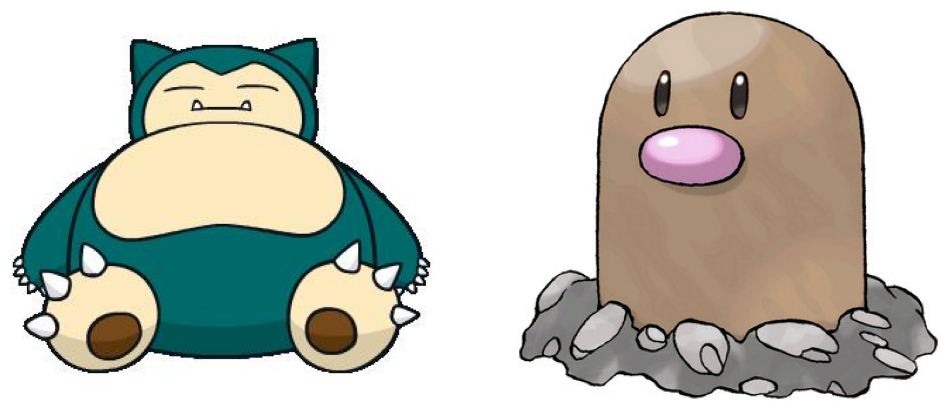

In [37]:
from PIL import Image

img1 = Image.open('validation/Snorlax/4.jpg')
img2 = Image.open('validation/Diglett/0.jpg')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()

In [38]:
img1_input = data_transforms['validation'](img1)
img2_input = data_transforms['validation'](img2)
print(img1_input.shape)
print(img2_input.shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [39]:
test_batch = torch.stack([img1_input, img2_input])
test_batch = test_batch.to(device)
test_batch.shape

torch.Size([2, 3, 224, 224])

In [40]:
y_pred = model(test_batch)
y_pred

tensor([[-10.1381, -18.2518, -16.0891, -13.0126, -18.1286, -17.1851, -15.6250,
         -13.1667, -13.5227,  -6.7796, -13.8471,  -9.7336,  -4.9369, -13.6744,
          -9.3085,  -8.9335, -15.6262, -10.8516, -13.3686, -11.2549,  -8.4466,
          -6.4885,  -6.5071, -16.3503, -14.5905, -11.8353,  -9.9806,  -8.7323,
          -9.7071,  -8.2985, -13.0898,  -8.7130, -19.6752, -13.4941, -11.8880,
          -9.1840, -13.9102, -17.0178, -13.1194, -11.5825,  -9.4896, -17.9141,
          -9.5629, -16.5170, -13.3171, -12.2587, -16.4166, -18.3653,  -9.4935,
         -13.2763, -17.6866, -13.7130, -14.7392, -14.6677, -11.6655, -10.5128,
         -12.3555,  -7.9406, -14.8172,  -6.5830, -10.8367, -12.2928, -12.8076,
         -17.0396, -10.1280, -13.5942,  -6.7088, -11.5467,  -7.6642,  -5.2480,
         -15.8393, -15.2643, -11.4280, -10.1169, -13.1539, -14.3218, -15.0127,
         -15.6476, -11.6592, -10.1635, -16.6752, -11.6984,  -8.3909, -15.6058,
          -7.2380, -10.5447,  -9.6789,  -7.1109, -10

In [41]:
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[3.8409e-07, 1.1500e-10, 9.9987e-10, 2.1680e-08, 1.3008e-10, 3.3419e-10,
         1.5903e-09, 1.8584e-08, 1.3018e-08, 1.1042e-05, 9.4116e-09, 5.7562e-07,
         6.9708e-05, 1.1186e-08, 8.8054e-07, 1.2811e-06, 1.5886e-09, 1.8818e-07,
         1.5187e-08, 1.2573e-07, 2.0848e-06, 1.4772e-05, 1.4500e-05, 7.7007e-10,
         4.4750e-09, 7.0364e-08, 4.4960e-07, 1.5666e-06, 5.9103e-07, 2.4175e-06,
         2.0070e-08, 1.5971e-06, 2.7703e-11, 1.3395e-08, 6.6755e-08, 9.9726e-07,
         8.8359e-09, 3.9501e-10, 1.9485e-08, 9.0609e-08, 7.3466e-07, 1.6121e-10,
         6.8274e-07, 6.5181e-10, 1.5988e-08, 4.6078e-08, 7.2068e-10, 1.0266e-10,
         7.3183e-07, 1.6655e-08, 2.0238e-10, 1.0762e-08, 3.8567e-09, 4.1426e-09,
         8.3389e-08, 2.6407e-07, 4.1824e-08, 3.4579e-06, 3.5671e-09, 1.3440e-05,
         1.9100e-07, 4.4530e-08, 2.6614e-08, 3.8651e-10, 3.8799e-07, 1.2120e-08,
         1.1852e-05, 9.3909e-08, 4.5587e-06, 5.1071e-05, 1.2836e-09, 2.2812e-09,
         1.0574e-07, 3.9231e

In [42]:
probs, idx = torch.topk(y_prob, k=3)
print(probs)
print(idx)

tensor([[9.9668e-01, 3.0082e-03, 6.9708e-05],
        [9.9973e-01, 1.2713e-04, 9.1248e-05]], device='cuda:0',
       grad_fn=<TopkBackward0>)
tensor([[125, 124,  12],
        [ 21, 143,  29]], device='cuda:0')


(-0.5, 359.5, 332.5, -0.5)

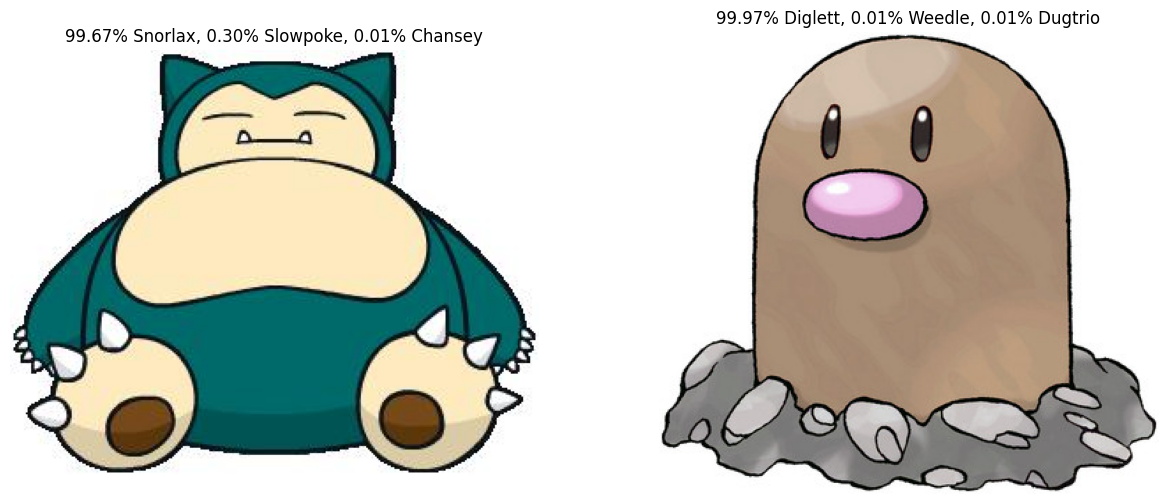

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[0, 0] * 100,
    image_datasets['validation'].classes[idx[0, 0]],
    probs[0, 1] * 100,
    image_datasets['validation'].classes[idx[0, 1]],
    probs[0, 2] * 100,
    image_datasets['validation'].classes[idx[0, 2]],
))
axes[0].imshow(img1)
axes[0].axis('off')

axes[1].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[1, 0] * 100,
    image_datasets['validation'].classes[idx[1, 0]],
    probs[1, 1] * 100,
    image_datasets['validation'].classes[idx[1, 1]],
    probs[1, 2] * 100,
    image_datasets['validation'].classes[idx[1, 2]],
))
axes[1].imshow(img2)
axes[1].axis('off')

### 과제
"예측", "분류" 둘 중 자유로운 주제를 선정하여 딥러닝 모델을 만들고 그 결과를 출력